## Part 1
Find the shortest path from the top left to bottom right.  
Each value can be seen as the distance to it from its neighbors.

In [67]:
with open("input/day15.txt", "r") as f:
    graph = [[int(x) for x in y.strip()] for y in f.readlines()]

In [69]:
"""
Run this section for part 2
It will increase the widh and height by a factor of five
and fill the new space according to the rules
"""
times_larger = 5
extended_graph = [[0 for x in range(len(graph[0])*times_larger)] for y in range(len(graph)*times_larger)]

original_width = len(graph[0])
original_height = len(graph)

for y in range(len(extended_graph)):
    for x in range(len(extended_graph[0])):
        x_ref = x % original_width
        y_ref = y % original_height
        val = graph[y_ref][x_ref]        
        
        extra_x = int((x/original_width))
        extra_y = int((y/original_height))
        
        val += extra_x + extra_y
        
        # Trick for wrapping from 9 to 1
        val -= 1
        val %= 9
        val += 1
        
        extended_graph[y][x] = val
        
graph = extended_graph

In [70]:
start_node = [0,0]
goal_node = [len(graph[0])-1, len(graph)-1]
print(f"{start_node}, {goal_node}")

[0, 0], [499, 499]


### Djikstra's Algorithm
https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm

In [79]:
import math

unvisited_set = [[True for x in y] for y in graph]
tentative_distance = [[math.inf for x in y] for y in graph]
tentative_distance[0][0] = 0
prev_node = [[[] for x in y] for y in graph]

def getUnvisitedNeighbors(node):
    neighbor_dirs = [[0,1],[0,-1],[1,0],[-1,0]]    
    neighbors = []
    for direction in neighbor_dirs:
        x = node[0] + direction[0]
        y = node[1] + direction[1]
        if x < 0 or y < 0 or x >= len(graph[0]) or y >= len(graph):
            continue
        if unvisited_set[y][x]:
            neighbors.append([x,y])
    return neighbors

frontier = [start_node]
while frontier != []:
    node = frontier.pop()
    if node == goal_node:
        print("Goal Reached!")
        break
    x,y = node
    current_distance = tentative_distance[y][x]
    neighbors = getUnvisitedNeighbors(node)
    for neighbor in neighbors:
        nx, ny = neighbor
        neighbor_distance = graph[ny][nx]
        new_tentative_dist_to_neighbor = current_distance + neighbor_distance
        if new_tentative_dist_to_neighbor < tentative_distance[ny][nx]:
            tentative_distance[ny][nx] = new_tentative_dist_to_neighbor
            prev_node[ny][nx] = node
            frontier.insert(0,[nx,ny])
    
    # TODO: Need to find a faster way of always picking the smallest frontier
    frontier = sorted(frontier, key=lambda x: -tentative_distance[x[1]][x[0]])
    
    unvisited_set[y][x] = False
print(f"Lowest risk is {tentative_distance[goal_node[1]][goal_node[0]]}")

Goal Reached!
2858
Lowest risk is 2858


## Fun visualization of the shortest path

In [85]:
import png

path = []
prev = goal_node
while prev != []:
    path.insert(0,prev)
    x,y = prev
    prev = prev_node[y][x]

image = []
for y in range(len(graph)):
    row = []
    for x in range(len(graph[0])):
        if [x,y] in path:
            row.append(255)
        else:
            row.append(0)
    image.append(row)
    
png.from_array(image, 'L').save("figures/day15_path.png")

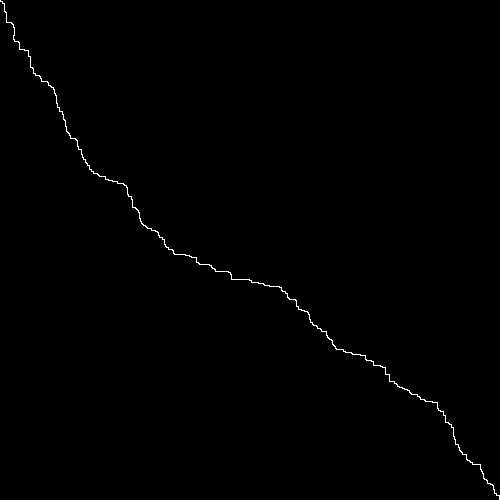

In [87]:
from IPython.display import Image
Image(filename="figures/day15_path.png") 